In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import warnings; warnings.simplefilter('ignore')

In [24]:
import pystan

# Exercise 3

In [3]:
# Logistic regression model from "Stan Modeling Language: User’s Guide and Reference Manual" (p.133-134)

model = '''
data {
    int K;
    int N;
    int D;
    int t[N];
    vector[D] x[N];
}
parameters {
    matrix[K,D] w;
}
model {
    for (k in 1:K)
        w[k] ~ normal(0, 1);
    for (n in 1:N)
        t[n] ~ categorical_logit(w * x[n]);
}
'''

In [4]:
# reload the model
log_reg = pickle.load(open('log_reg.pkl', 'rb'))

In [5]:
# Import iris dataset
iris = datasets.load_iris()
data = iris['data']
target_0 = iris['target']

In [6]:
# Add an extra dimention to data, so the matrixes can be simply muliplicated
x = np.vstack([np.ones(150),data.T]).T

In [7]:
# Stan counts from 1 but the target classes are from 0, so we just shift them
target = target_0 + 1

In [8]:
# Values of parameters
model_data = {'N':x.shape[0], 'D':x.shape[1], 'K':3, 't':target, 'x':x}

In [9]:
# Fit the model
fit = log_reg.sampling(data=model_data, iter=1000, chains=4)

In [10]:
print(fit)

Inference for Stan model: log_reg_a8cfca39720164a29e0ad51497cabc55.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
w[0,0]   0.37    0.02   0.98  -1.53  -0.31   0.35   1.01   2.38   2000    1.0
w[1,0]   0.71    0.02   0.98  -1.18 9.7e-3   0.71   1.39   2.59   2000    1.0
w[2,0]  -1.08    0.02   0.99  -3.05  -1.75  -1.12  -0.42   0.91   2000    1.0
w[0,1]   0.76    0.02   0.73  -0.68   0.28   0.75   1.25    2.2   1836    1.0
w[1,1]   0.53    0.02   0.67  -0.72   0.07   0.54   0.99   1.88   1620    1.0
w[2,1]  -1.32    0.02   0.69  -2.67  -1.78  -1.31  -0.86   0.04   1600    1.0
w[0,2]   1.81    0.02   0.83    0.2   1.27   1.82   2.36   3.46   2000    1.0
w[1,2]   -0.2    0.02   0.75  -1.68   -0.7   -0.2   0.29   1.25   1599    1.0
w[2,2]  -1.61    0.02   0.78  -3.12  -2.13  -1.61  -1.09  -0.08   1798    1.0
w[0,3]   -2.5    0.02   0.78  -4.06 

In [11]:
ext = fit.extract(permuted=False)

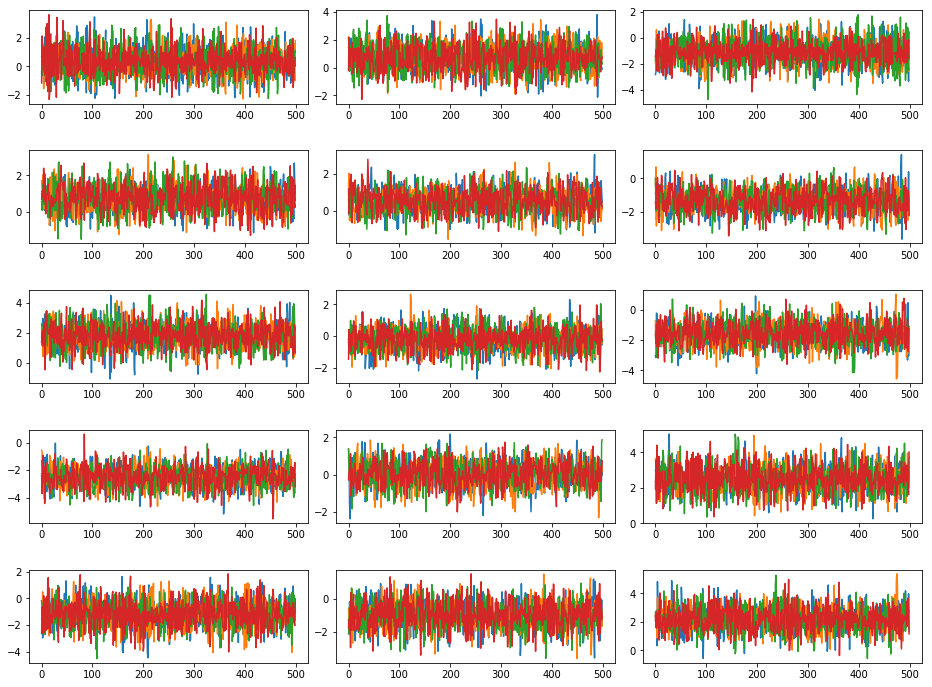

In [53]:
fig, axs = plt.subplots(5,3, figsize=(16, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for i in range(15):
    axs[i].plot(ext[:,:,i])

# Exercise 4

In [13]:
model4 = '''
data {
}
parameters {
    real x;
    real y;
}
model {
    target += - fabs(x) + 0.5 * log(fabs(x)) - 0.5 * fabs(x) * y^2;
}
'''

In [14]:
ex4 = pystan.StanModel(model_code=model4, model_name='ex4')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL ex4_132a38a396aad8292eed506b44923253 NOW.


In [15]:
fit4 = ex4.sampling(iter=1000, chains=4)

In [16]:
print(fit4)

Inference for Stan model: ex4_132a38a396aad8292eed506b44923253.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x      0.04    0.09   1.38  -2.68  -0.77   0.11   0.76   3.14    243    1.0
y     -0.22    0.09   1.42  -3.61  -0.94  -0.08   0.66   2.38    241   1.03
lp__  -1.68    0.03   0.83  -3.94  -1.99  -1.43  -1.09  -0.87    569   1.01

Samples were drawn using NUTS at Mon Jun 11 15:33:06 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [44]:
ext4 = fit4.extract(permuted=True)
ext4_chains = fit4.extract(permuted=False)

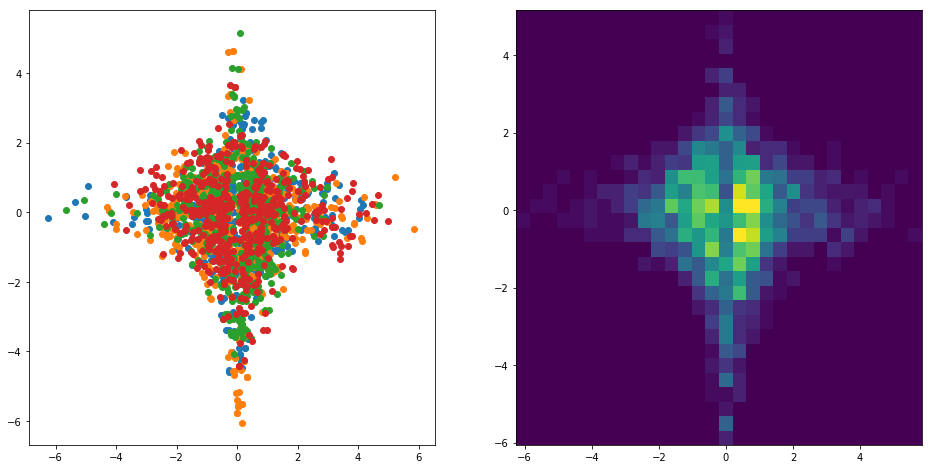

In [49]:
fig, axs = plt.subplots(1,2, figsize=(16, 8), facecolor='w', edgecolor='k')
axs[0].scatter(ext4_chains[:,0,0], ext4_chains[:,0,1])
axs[0].scatter(ext4_chains[:,1,0], ext4_chains[:,1,1])
axs[0].scatter(ext4_chains[:,2,0], ext4_chains[:,2,1])
axs[0].scatter(ext4_chains[:,3,0], ext4_chains[:,3,1])
axs[1].hist2d(ext4['x'], ext4['y'], 30, normed=True)
plt.show()

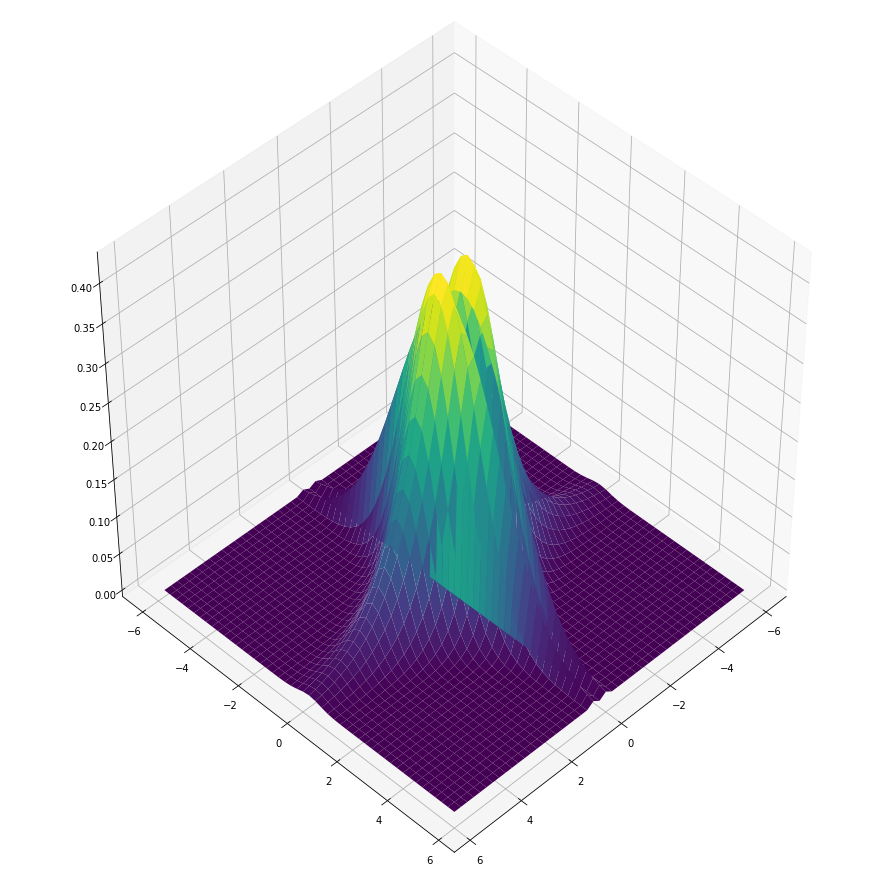

In [31]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(X, Y)

Z = np.exp(-np.abs(X))*np.sqrt(np.abs(X))*np.exp(-0.5*np.abs(X)*Y*Y)

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
ax.view_init(45, 45)
plt.show()

In [54]:
import plotly
import plotly.graph_objs as go
import pandas as pd
plotly.offline.init_notebook_mode(connected=True)

data = [go.Surface(z=Z)]
layout = go.Layout()
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)